In [ ]:
!apt install radare2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libcapstone-dev libcapstone3 libmagic-dev libmagic-mgc libmagic1
  libradare2-2.3 libradare2-common libradare2-dev libzip4
Suggested packages:
  file
The following NEW packages will be installed:
  libcapstone-dev libcapstone3 libmagic-dev libmagic-mgc libmagic1
  libradare2-2.3 libradare2-common libradare2-dev libzip4 radare2
0 upgraded, 10 newly installed, 0 to remove and 42 not upgraded.
Need to get 4,704 kB of archives.
After this operation, 30.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 am

In [2]:
!rm -rf ./libfacedetection
!rm -rf ./PyFaceDet

!git clone --recursive https://github.com/OlegJakushkin/libfacedetection
!cd libfacedetection && cmake -DCMAKE_INSTALL_PREFIX=/usr/ -DBUILD_SHARED_LIBS=ON  -DCMAKE_BUILD_TYPE=Release -DDEMO=OFF . &&    cmake --build . --config Release  && cmake --build . --config Release --target install

!git clone --recursive https://github.com/OlegJakushkin/PyFaceDet
!cp -fr /usr/lib/x86_64-linux-gnu/libfacedetection.* ./PyFaceDet/PyFaceDet/

!ls ./PyFaceDet/PyFaceDet/

!pip3 install ./PyFaceDet
!cp -fr /usr/lib/x86_64-linux-gnu/libfacedetection.* /usr/local/lib/python3.7/dist-packages/PyFaceDet/

Cloning into 'libfacedetection'...
remote: Enumerating objects: 1032, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 1032 (delta 79), reused 112 (delta 63), pack-reused 871
Receiving objects: 100% (1032/1032), 92.38 MiB | 28.42 MiB/s, done.
Resolving deltas: 100% (464/464), done.
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
BUILD_VERSION:v0.0.1
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE

/usr/lib/x86_64-linux-gnu/libfacedetection.so
/usr/lib/x86_64-linux-gnu/libfacedetection.so.v0.0.1
facedetectcnn.py  __init__.py  libfacedetection.so  libfacedetection.so.v0.0.1


In [ ]:
!wget -O img.jpg https://c8.alamy.com/comp/BEC3DT/beautiful-barefoot-blond-lady-laying-in-poppy-field-BEC3DT.jpg

--2022-05-10 15:49:34--  https://c8.alamy.com/comp/BEC3DT/beautiful-barefoot-blond-lady-laying-in-poppy-field-BEC3DT.jpg
Resolving c8.alamy.com (c8.alamy.com)... 54.67.109.126, 54.215.201.117, 54.219.137.87, ...
Connecting to c8.alamy.com (c8.alamy.com)|54.67.109.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘img.jpg’

img.jpg                 [  <=>               ] 259.13K  1.18MB/s    in 0.2s    

Last-modified header invalid -- time-stamp ignored.
2022-05-10 15:49:35 (1.18 MB/s) - ‘img.jpg’ saved [265348]



In [ ]:
!rabin2 -s /usr/local/lib/python3.7/dist-packages/PyFaceDet/libfacedetection.so  | grep 'facedetect_cnn'

032 0x0000d498 0x0000d498  LOCAL OBJECT   15 facedetect_cnn(unsignedchar*,unsignedchar*,int,int,int)::__FUNCTION__
150 0x00006470 0x00006470 GLOBAL   FUNC  391 facedetect_cnn(unsignedchar*,unsignedchar*,int,int,int)


320 319 159 91 93


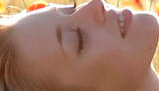

553 0 88 88 92


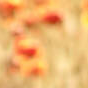

630 261 59 66 45
24 191 22 27 36
1188 164 21 25 26
591 556 12 16 26


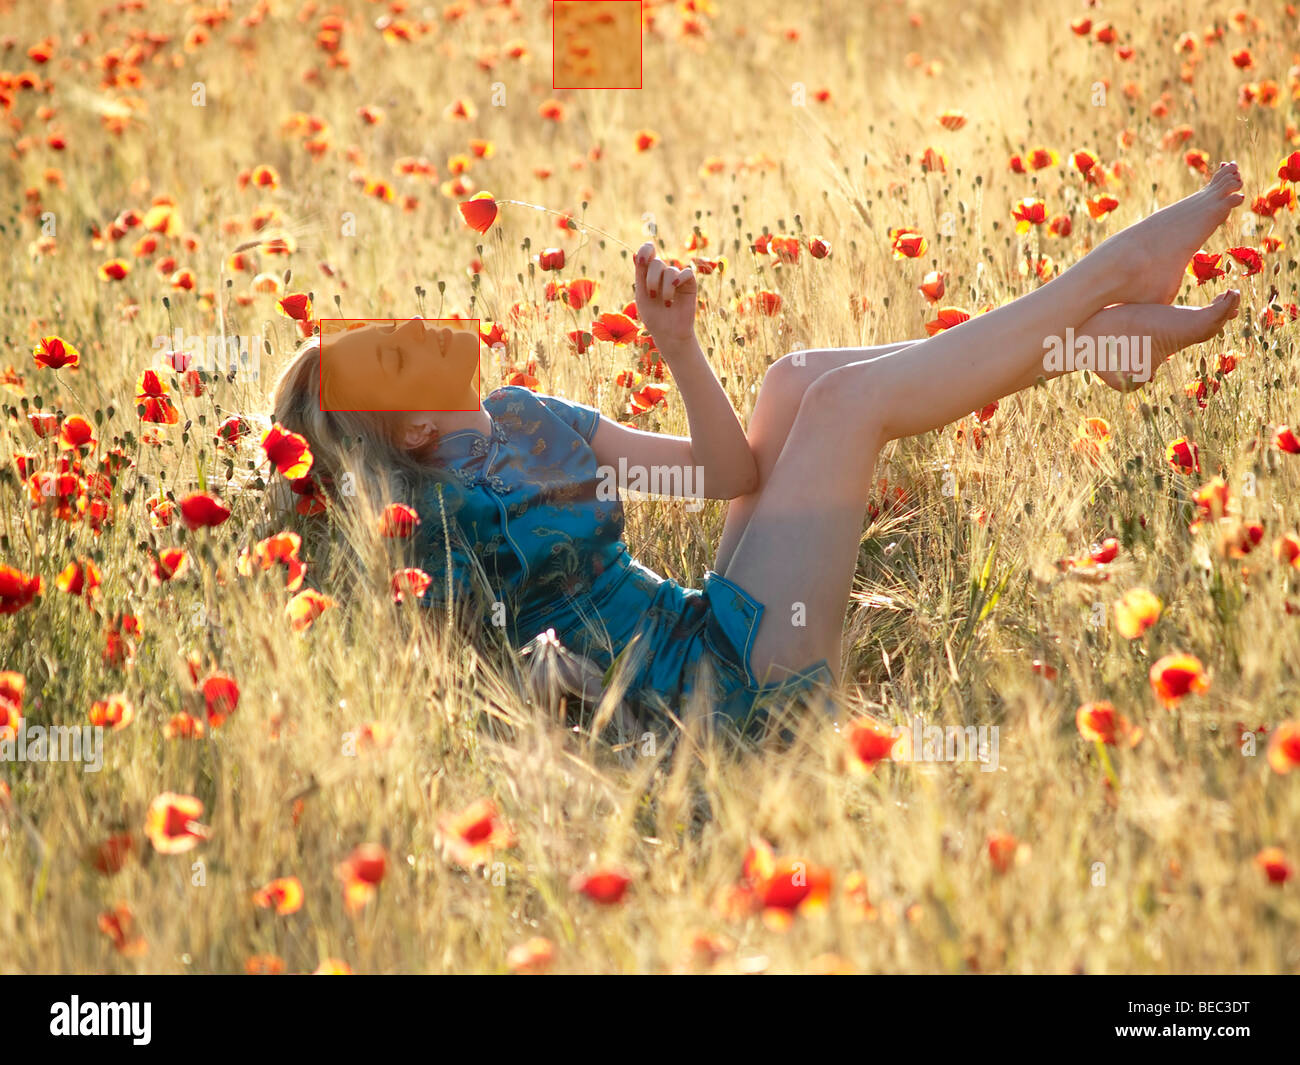

In [16]:
from PyFaceDet import facedetectcnn
from PIL import Image, ImageDraw, ImageOps , ImageFilter

image = Image.open("img.jpg")
draw  = ImageDraw.Draw(image, "RGBA") 
for x, y, w, h, confidence in facedetectcnn.facedetect_cnn(image):
    print(x, y, w, h, confidence)
    if confidence < 75: continue
    face = image.crop((x, y, x + w, y + h))
    display(face)
    draw.rectangle([(x,y), (x +w,y + h)], fill=(200, 100, 0, 127), outline ="red")

display(image)